In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import math
import random
import time
import operator

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [94]:
df = pd.read_csv("country_wise_latest.csv")
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [95]:
#CHECKING IF THERE ARE MISSING VALUES:FALSE
df.isnull()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [96]:
#CHECKING THE TOTAL OF MISSING VALUES;NO MISSING VALUES
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [97]:
df1 = pd.read_csv("world_population.csv")
df1

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [98]:
df1.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [99]:
df1 = df1.dropna()
print(df1)

     Rank CCA3            Country           Capital Continent  \
0      36  AFG        Afghanistan             Kabul      Asia   
1     138  ALB            Albania            Tirana    Europe   
2      34  DZA            Algeria           Algiers    Africa   
3     213  ASM     American Samoa         Pago Pago   Oceania   
4     203  AND            Andorra  Andorra la Vella    Europe   
..    ...  ...                ...               ...       ...   
228    16  VNM            Vietnam             Hanoi      Asia   
229   226  WLF  Wallis and Futuna          Mata-Utu   Oceania   
230   172  ESH     Western Sahara          El Aaiún    Africa   
231    46  YEM              Yemen             Sanaa      Asia   
233    74  ZWE           Zimbabwe            Harare    Africa   

     2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771.0       38972230.0       33753499.0       28189672.0   
1          2842321.0        2866849.0        2882481.0        2913399

FEATURE ENGINEERING

In [100]:
unique = df["Country/Region"].unique()
unique.sort()

unique1 = df1["Country"].unique()
unique1.sort()

In [101]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
df =pd.read_csv("country_wise_latest.csv")


df.rename(columns={'Country/Region': 'Country'},inplace=True)
df['Country'] = df['Country'].replace('US', 'United States')
df['Country'] = df['Country'].replace('Holy See', 'Vatican City')

df2 = df1[['Country', '2020 Population']]
data = pd.merge(df, df2, on="Country", how='inner')

data['Daily Growth Rate(%)'] = data['Confirmed'].pct_change().fillna(0)*100
data['Mortality Ratio(%)'] = (data['Deaths']/ data['Confirmed']).fillna(0)*100
data['Cases per 100,000'] = (data['Confirmed']/ data['2020 Population'])*100000
data

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,2020 Population,Daily Growth Rate(%),Mortality Ratio(%),"Cases per 100,000"
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,38972230.0,0.000000,3.499435,93.048306
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2866849.0,-86.542757,2.950820,170.221731
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,43451666.0,473.217213,4.157581,64.377278
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,77700.0,-96.757588,5.733186,1167.310167
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,33428485.0,4.740904,4.315789,2.841888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,21209,121,11674,9414,678,5,569,0.57,55.04,1.04,17149,4060,23.67,Europe,33526656.0,1664.475874,0.570513,63.260112
151,Vietnam,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,Western Pacific,96648685.0,-97.967844,0.000000,0.445945
152,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,556048.0,-97.679814,10.000000,1.798406
153,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,32284046.0,16810.000000,28.562980,5.237881


In [102]:
#CHECKING FOR MISSING VALUES
missing_values = data.isnull().sum()
missing_values


Country                   0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
2020 Population           0
Daily Growth Rate(%)      0
Mortality Ratio(%)        0
Cases per 100,000         0
dtype: int64

In [103]:
data.dropna(inplace=True)

In [104]:
#RENAMIN COLUMNS FOR CONSISTENCY
data.rename(columns={'Country/Region': 'Country',
                  'Deaths / 100 Cases': 'Death Rate (%)',
                  'Recovered / 100 Cases': 'Recovery Rate (%)',
                  '1 week % increase': 'Weekly Increase (%)'}, inplace=True)

# Convert percentage columns to numeric
percentage_cols = ['Death Rate (%)', 'Recovery Rate (%)', 'Weekly Increase (%)']
for col in percentage_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Verify data types
data.dtypes

Country                    object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Death Rate (%)            float64
Recovery Rate (%)         float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
Weekly Increase (%)       float64
WHO Region                 object
2020 Population           float64
Daily Growth Rate(%)      float64
Mortality Ratio(%)        float64
Cases per 100,000         float64
dtype: object

In [105]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,155.0,9.400898e+04,4.041438e+05,10.000000,1.080000e+03,7.189000e+03,5.212550e+04,4.290259e+06
Deaths,155.0,3.926077e+03,1.522193e+04,0.000000,2.050000e+01,1.210000e+02,1.217500e+03,1.480110e+05
Recovered,155.0,5.335260e+04,1.947856e+05,0.000000,5.595000e+02,3.824000e+03,2.689900e+04,1.846641e+06
Active,155.0,3.673030e+04,2.309230e+05,0.000000,1.460000e+02,1.991000e+03,1.100650e+04,2.816444e+06
New cases,155.0,1.066916e+03,5.048652e+03,0.000000,3.000000e+00,6.500000e+01,4.680000e+02,5.633600e+04
New deaths,155.0,2.725161e+01,1.155888e+02,0.000000,0.000000e+00,1.000000e+00,6.000000e+00,1.076000e+03
New recovered,155.0,8.213613e+02,3.670076e+03,0.000000,0.000000e+00,2.600000e+01,2.520000e+02,3.372800e+04
Death Rate (%),155.0,3.172129e+00,3.620732e+00,0.000000,9.400000e-01,2.290000e+00,4.145000e+00,2.856000e+01
Recovery Rate (%),155.0,6.517568e+01,2.617651e+01,0.000000,4.817000e+01,7.208000e+01,8.763000e+01,1.000000e+02
Deaths / 100 Recovered,155.0,inf,NaN,0.000000,1.400000e+00,3.700000e+00,6.665000e+00,inf


In [106]:
X = data.drop(columns=['New cases','Country','2020 Population','Cases per 100,000','WHO Region','Death Rate (%)','Recovery Rate (%)','Weekly Increase (%)','Deaths / 100 Recovered','Daily Growth Rate(%)','Mortality Ratio(%)'])
y = data['New cases']

In [107]:
correlation_matrix = X.corr()

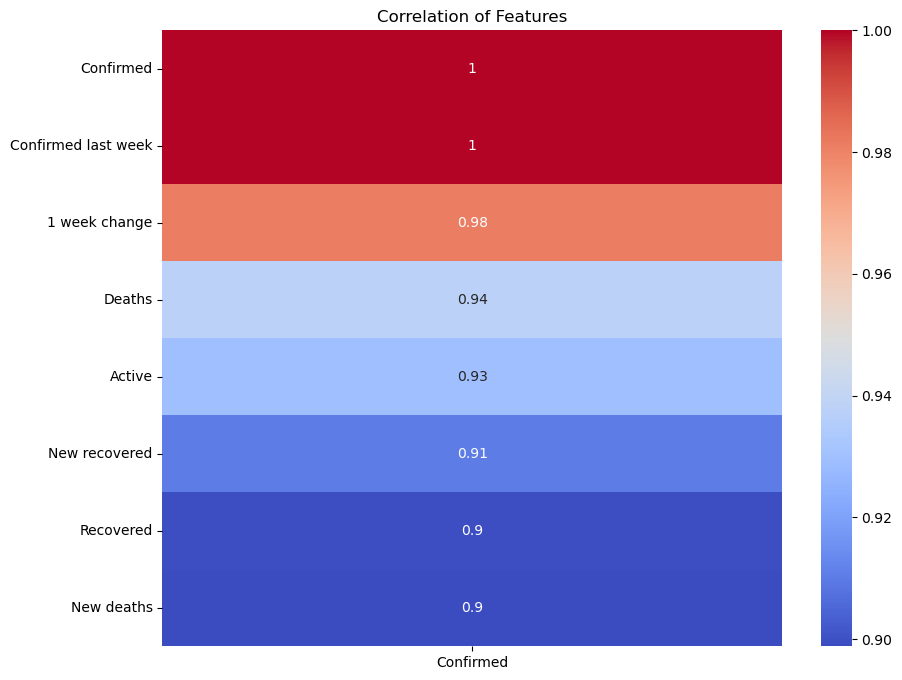

In [108]:
# Display the correlation of features with 'New cases'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Confirmed']].sort_values(by='Confirmed', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation of Features")
plt.savefig("Correlation of Features with New cases2.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

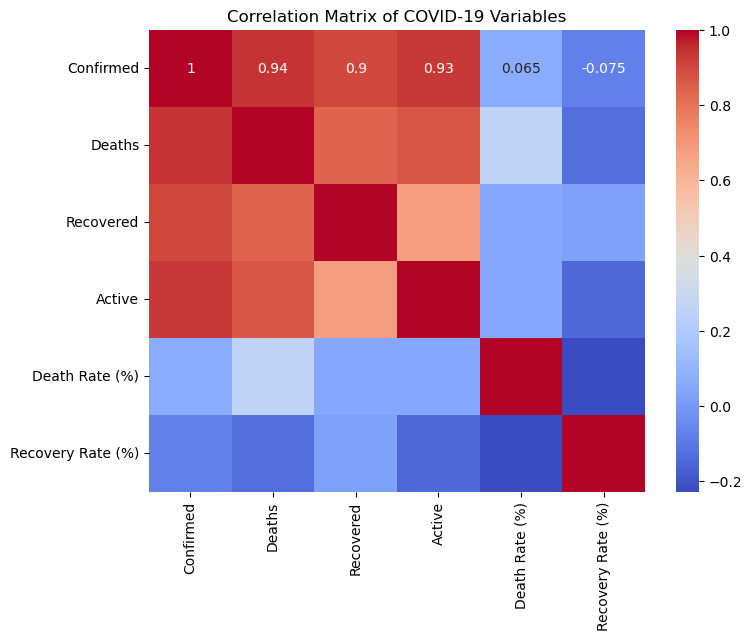

In [109]:
#SHOWING RELATIONSHIP BETWEEN VARIABLES
corr_matrix = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Death Rate (%)', 'Recovery Rate (%)']].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()

#High positive correlation between Confirmed cases and Deaths suggests that countries with more cases tend to have more deaths.

#Recovery Rate (%) may have a negative correlation with Death Rate (%), indicating that as recovery rates increase, death rates decrease

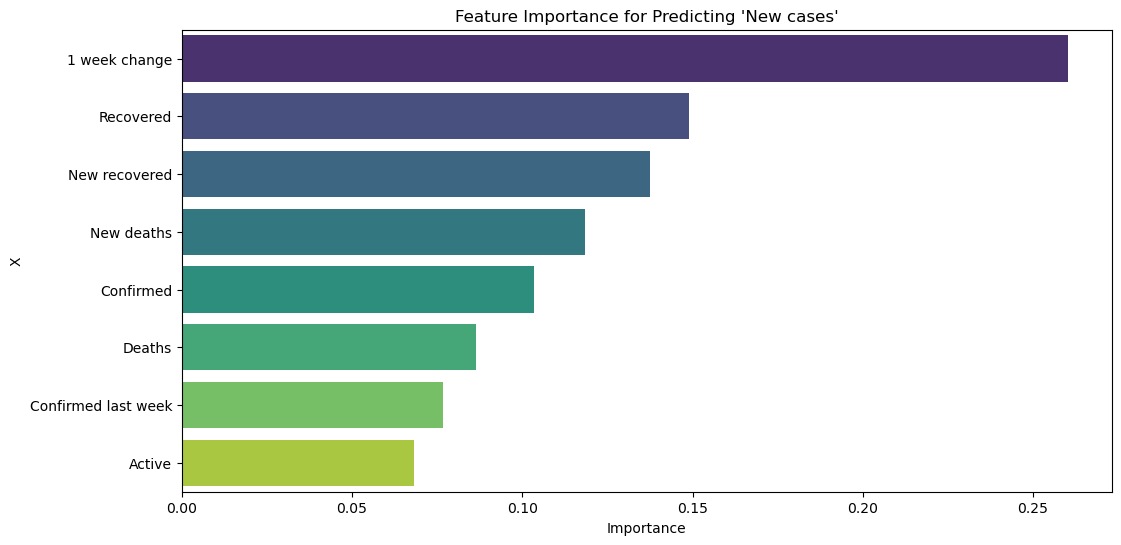

In [110]:
#REPLACING INFINITE VALUES WITH
X.replace([np.inf, -np.inf], np.nan, inplace=True)

#REPLACING NaN VALUES WITH MEAN
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importances
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'X': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='X', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting 'New cases'")
plt.savefig("Feature Importance for Predicting New cases2.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

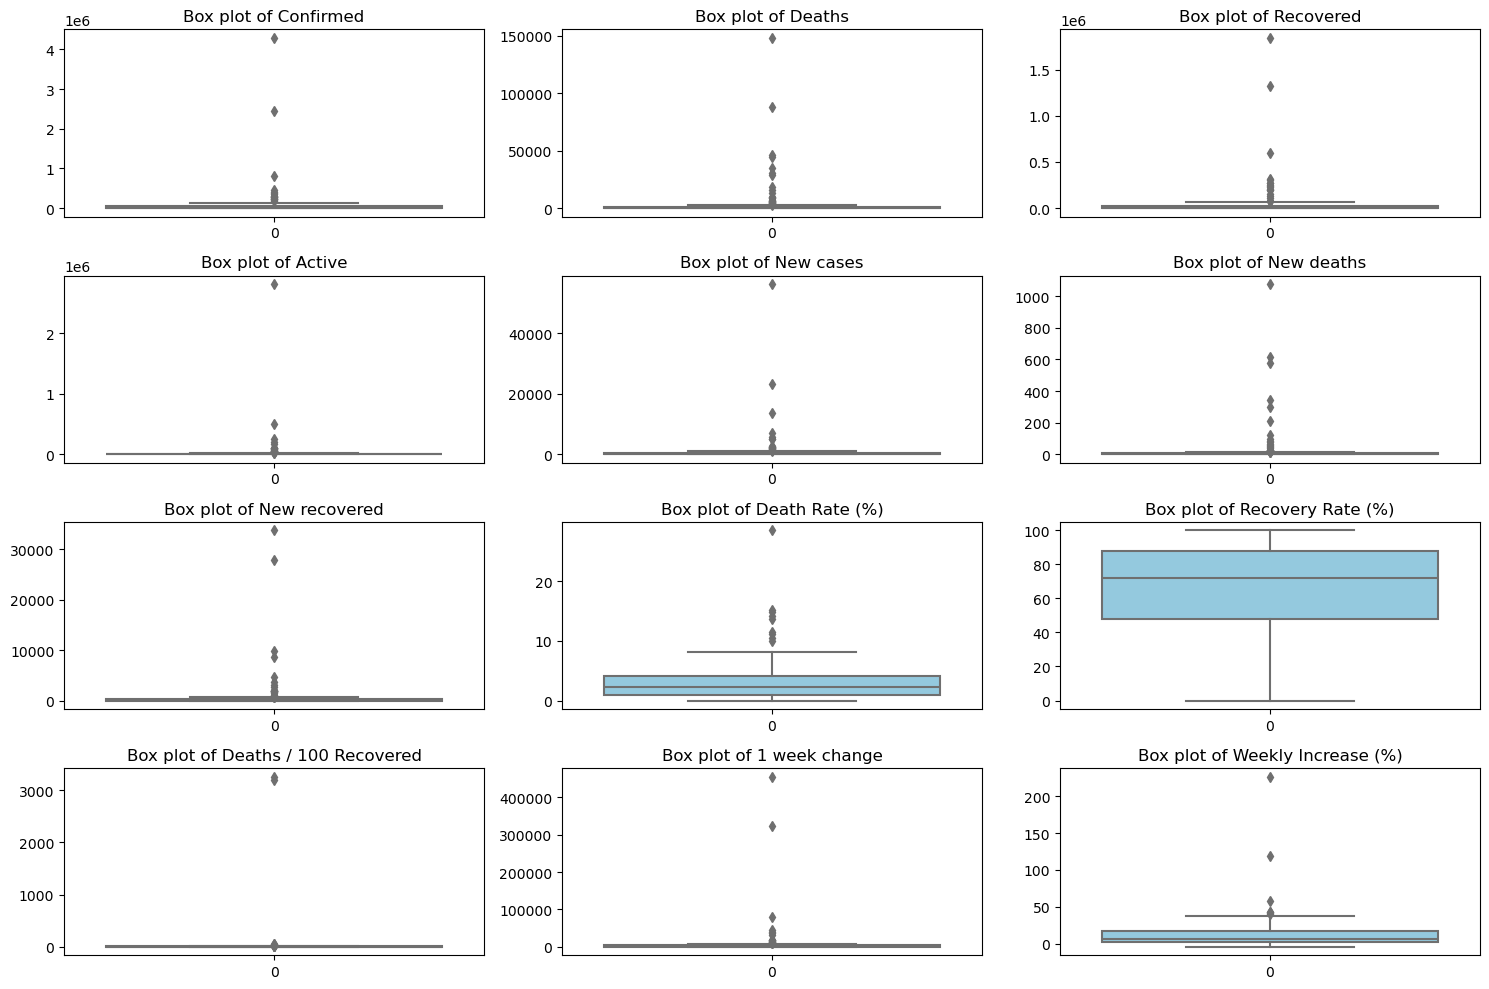

In [111]:
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
                     'Death Rate (%)', 'Recovery Rate (%)', 'Deaths / 100 Recovered', 
                     '1 week change', 'Weekly Increase (%)']

# Create box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[column], color='skyblue')
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.savefig("Outliers in the dataset.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

EXPLORATORY DATA ANALYSIS

Daily Growth Rate(%) Distribution

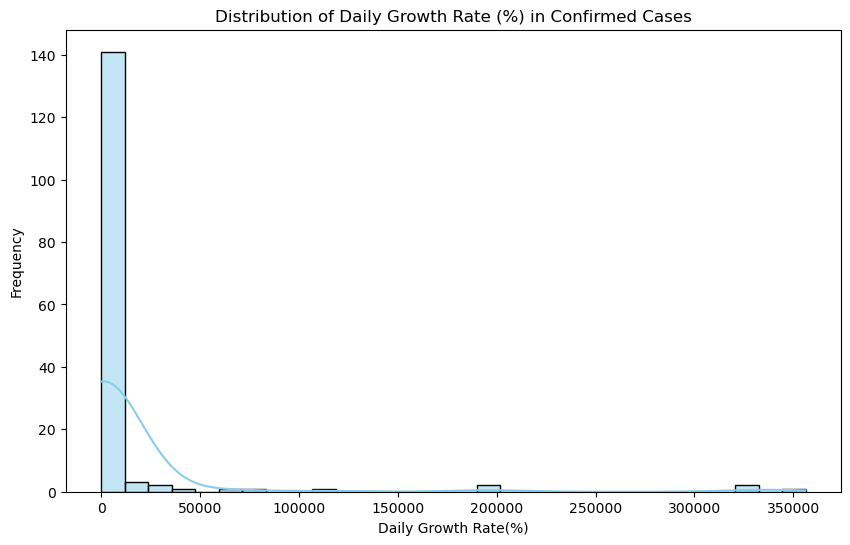

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Daily Growth Rate(%)'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Daily Growth Rate (%) in Confirmed Cases")
plt.xlabel("Daily Growth Rate(%)")
plt.ylabel("Frequency")
plt.savefig("Daily growth rate.png",format="png",dpi=300, bbox_inches="tight")
plt.show()

Distribution of Mortality Ratio(%)

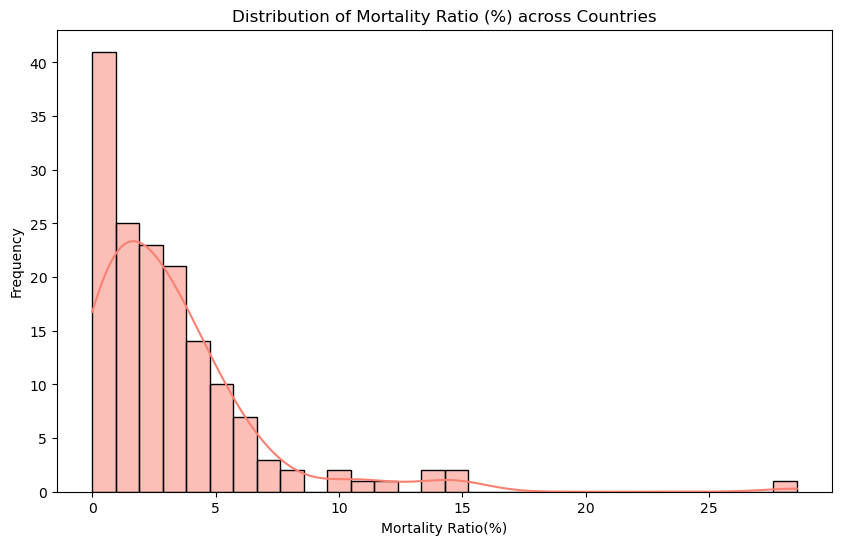

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Mortality Ratio(%)'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Mortality Ratio (%) across Countries")
plt.xlabel("Mortality Ratio(%)")
plt.ylabel("Frequency")
plt.savefig("Distribution of mortality rate.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

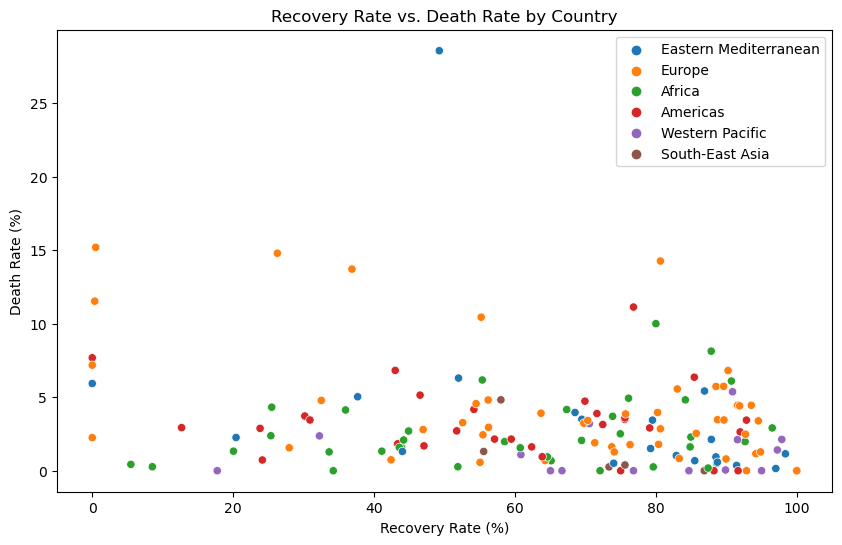

In [114]:
# Scatter plot for mortality vs. recovery rates

plt.figure(figsize=(10,6))
sns.scatterplot(x='Recovery Rate (%)', y = 'Death Rate (%)', data = data, hue='WHO Region')
plt.title('Recovery Rate vs. Death Rate by Country')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Death Rate (%)')
plt.legend(loc='upper right')
plt.show()

In [115]:
# Top 10 countries

top_confirmed = data.nlargest(10, 'Confirmed')
display(top_confirmed)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Death Rate (%),Recovery Rate (%),Deaths / 100 Recovered,Confirmed last week,1 week change,Weekly Increase (%),WHO Region,2020 Population,Daily Growth Rate(%),Mortality Ratio(%),"Cases per 100,000"
144,United States,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas,335942003.0,1789.823759,3.449932,1277.083235
22,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas,213196304.0,330397.293640,3.587410,1145.599128
117,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe,145617329.0,1679.181735,1.632708,560.839843
130,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa,58801927.0,21583.229516,1.561668,769.581922
92,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas,125998302.0,114867.732558,11.131030,313.884389
111,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas,33304756.0,8468.975374,4.725993,1170.154197
32,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas,19300315.0,37635.683297,2.640527,1802.680423
148,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe,67059474.0,409.839972,15.194824,449.911074
66,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean,87290193.0,192.719061,5.419508,336.356227
107,Pakistan,274289,5842,241026,27421,1176,20,3592,2.13,87.87,2.42,266096,8193,3.08,Eastern Mediterranean,227196741.0,255.951361,2.129870,120.727524


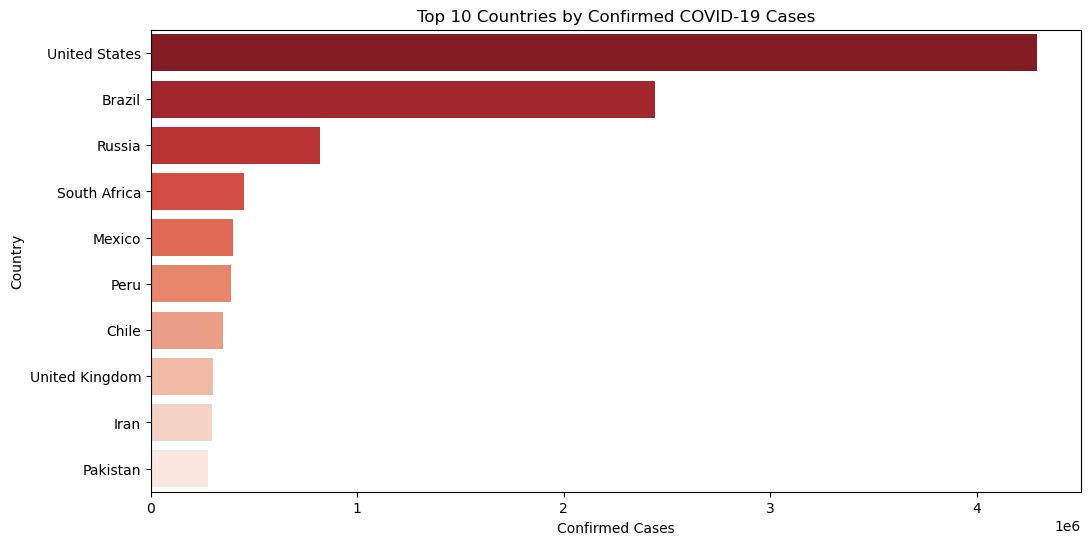

In [116]:
# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Confirmed', y = 'Country', data=top_confirmed, palette='Reds_r')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.show()

In [117]:
top_10_cases = data.nsmallest(10, 'Confirmed')
display(top_10_cases)

,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Death Rate (%),Recovery Rate (%),Deaths / 100 Recovered,Confirmed last week,1 week change,Weekly Increase (%),WHO Region,2020 Population,Daily Growth Rate(%),Mortality Ratio(%),"Cases per 100,000"
152,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,556048.0,-97.679814,10.000000,1.798406
63,Vatican City,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.00,Europe,520.0,-99.836512,0.000000,2307.692308
56,Greenland,14,0,13,1,1,0,0,0.00,92.86,0.00,13,1,7.69,Europe,56026.0,-99.668796,0.000000,24.988398
119,Saint Kitts and Nevis,17,0,15,2,0,0,0,0.00,88.24,0.00,17,0,0.00,Americas,47642.0,-99.095263,0.000000,35.682801
41,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.00,Americas,71995.0,-99.644198,0.000000,25.001736
77,Laos,20,0,19,1,0,0,0,0.00,95.00,0.00,19,1,5.26,Western Pacific,7319399.0,-99.939933,0.000000,0.273246
57,Grenada,23,0,23,0,0,0,0,0.00,100.00,0.00,23,0,0.00,Americas,123663.0,64.285714,0.000000,18.598934
120,Saint Lucia,24,0,22,2,0,0,0,0.00,91.67,0.00,23,1,4.35,Americas,179237.0,41.176471,0.000000,13.390092
49,Fiji,27,0,18,9,0,0,0,0.00,66.67,0.00,27,0,0.00,Western Pacific,920422.0,-99.814395,0.000000,2.933437
16,Belize,48,2,26,20,0,0,0,4.17,54.17,7.69,40,8,20.00,Americas,394921.0,-99.927741,4.166667,12.154330


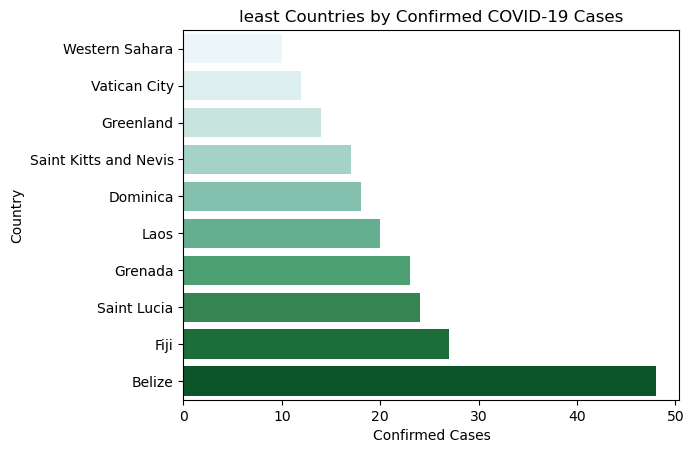

In [118]:
sns.barplot(data=top_10_cases, x='Confirmed', y='Country', palette='BuGn')
plt.title('least Countries by Confirmed COVID-19 Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.savefig("least country by confirmed cases.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

DEATH RATE VS RECOVERY RATE

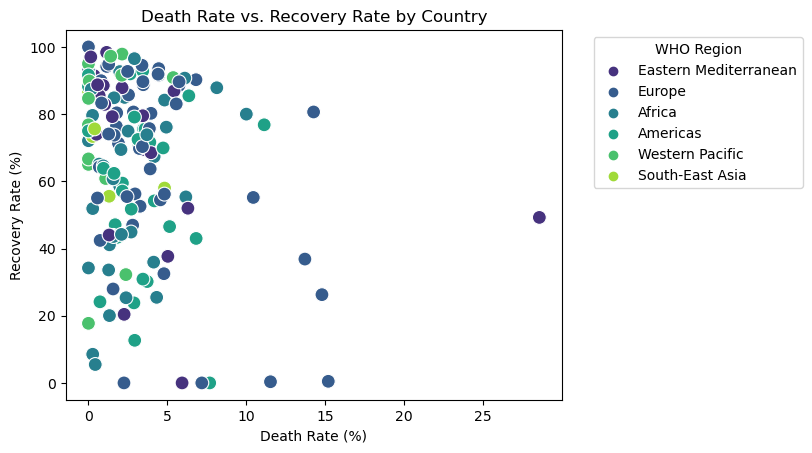

In [119]:
sns.scatterplot(data=data, x='Death Rate (%)', y='Recovery Rate (%)', hue='WHO Region', s=100, palette='viridis')
plt.title('Death Rate vs. Recovery Rate by Country')
plt.xlabel('Death Rate (%)')
plt.ylabel('Recovery Rate (%)')
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Death Rate vs. Recovery Rate by Country.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

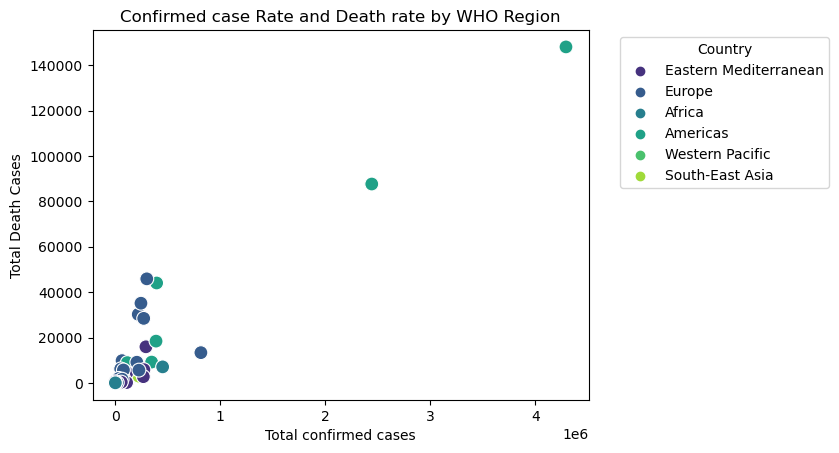

In [120]:
sns.scatterplot(data=data, x='Confirmed', y='Deaths', hue='WHO Region', s=100, palette='viridis')
plt.title('Confirmed case Rate and Death rate by WHO Region')
plt.xlabel('Total confirmed cases')
plt.ylabel('Total Death Cases')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Confirmed Case rate and death rate by WHO Region.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

In [121]:
# Feature Selection
X = data[['Confirmed', 'Recovered', 'Active']]
y = data['Deaths']

In [122]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model = RandomForestClassifier(max_depth=5,random_state=42)

In [124]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [125]:
pred = model.predict(X_test)

In [126]:
print("Accuracy:", accuracy_score(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Accuracy: 0.03225806451612903
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         1
          59       0.00      0.00      0.00         1
          66       0.00      0.00      0.00         1
          69       0.00      0.00      0.00         0
          72       0.00      0.00      0.00         1
          75       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          91       0.00    

INSIGHTS

Hight Correlation between Confirmed Cases and Deaths: Indicates that countries with more cases are likely to have more deaths, emphasizing the need for case management.
Variation in Mortality and Recovery Rates: Suggests differences in healthcare quality, demographics, and pandemic response among countries.

 Countries in clusters with higher death rates should evaluate and adopt best practices from nations with lower rates.